<center>
    
## <font color='maroon'>ASTR 20500</font>
## <font color='maroon'>homework assignment 3</font>
    
### <font color='maroon'>Distribution of a sum of $N$ random numbers, plotting distributions

### <font color='maroon'>Using statistics to design tests of a random number generator

    
#### <font color='black'>distributed: Friday, October 15</font>
#### <font color='black'>due: Thursday, October 22 (11pm)</font>
    
    
#### 45 points total (+>=5 potential extra-credit points)
</center>



Information you need to carry out exercises in this assignment is available in the distributed notebooks  [03_probability_distributions_poisson](https://drive.google.com/file/d/12vmgU44wLBNsaCbQ5EVjc3Ta0dMczupt/view?usp=sharing) and [05_prngs](https://drive.google.com/file/d/1rBHcnst3KMF_gPj5ZA1KVfdKh_eE2sNO/view?usp=sharing). 

Background Python information useful for this assignment is provided in the [hw03_background_info](https://drive.google.com/file/d/1qhZDzuntM2wzWbJgmZvIBVoldF9t35_s/view?usp=sharing) notebook. 

In this homework you are required to attempt both exercises. The open-ended nature of the 2nd exercise and also exploration in exercise 1c are good to tackle in a small group setting where you can explore different ideas and calculation and discuss them with your group maters. You are therefore encouraged to form a group of 2 or 3 people (but not more then 4) and discuss approaches and results. You can also work on your own, if this is your preference. 

If you work in a group, you can discuss ideas and results but note that the actual calculations that you will present in your homework should be your own and group work does not mean that code should be shared. Code that you will be submitted should be written by you independently. 
  

### <font color='blue'>Exercise 1: first Monte Carlo experiment (15 points)</font>

**Background info.** During Friday class I introduced the concept of [Monte Carlo experiments](https://towardsdatascience.com/an-overview-of-monte-carlo-methods-675384eb1694), in which random outcomes are repeatedly realized to obtain an answer that may be difficult or impossible to obtain by other means (for example, via formal mathematical derivation). 

Here you will experiment with constructing lists of pseudo-random numbers and analyzing the distribution of values of the sums  of these numbers + plotting  distribution as a histogram. In the process you should see one of the most fundamental statistical laws emerge as a result of this Monte Carlo experiment. 

Python has a standard library module <tt>random</tt> and within this module a function <tt>random</tt> that returns pseudo-random numbers uniformly distributed in the interval $[0,1)$. [hw03_background_info](https://drive.google.com/file/d/1qhZDzuntM2wzWbJgmZvIBVoldF9t35_s/view?usp=sharing) notebook includes an example of how it is used to produce a list of random numbers. 

**Task 1a. (10 points)**. 

Write a function <tt>uniform_mean_mc()</tt> that has two integer arguments, <tt>ns</tt> and <tt>nr</tt> and returns a list of <tt>ns</tt> sums of random samples, as described below. 

Within your function, initialize an empty list of lenth <tt>ns</tt>, where <tt>ns</tt> is the number of Monte Carlo samples your code will produce.

*The outer loop* should iterate from 0 up to a number <tt>ns-1</tt> (<tt>ns</tt> is short for <tt>nsamples</tt>). 

Within this loop you should have a *nested* loop to compute a sum of <tt>nr</tt> pseudo-random numbers uniformly distributed in the interval $[-0.5, 0.5]$ using the <tt>random()</tt> function from module <tt>random</tt>, as shown in hw03_background_info notebook. Function <tt>random()</tt> generates random numbers in the range $[0,1]$, so you will need to rescale them to the interval $[-0.5, 0.5]$.  

After the nested loop is finished you should record the computed sum in the list. 

After both loops finish, you should have a list of length <tt>ns</tt> filled with <tt>ns</tt> sums, each of which is a sum of <tt>nr</tt> of random numbers uniformly distributed in the interval $[-0.5, 0.5]$.  

In [ ]:
from random import random

def uniform_mean_mc(ns, nr): 
    xs=[]
    for i in range(0,ns-1):
      sum=0
      for j in range(0,nr-1):
          sum += random()-0.5
      xs.append(sum)
    return xs

uniform_mean_mc(100,100)

**Task 1b. (2 points)** Plot distributions of the <tt>ns</tt> random sum values you obtained for, say, <tt>nr=100</tt> using <tt>Matplotlib</tt> routine <tt>hist</tt>, as shown in the example in [hw03_background_info](https://drive.google.com/file/d/1qhZDzuntM2wzWbJgmZvIBVoldF9t35_s/view?usp=sharing) notebook. Try different values of <tt>ns</tt>, but make the final plot for <tt>ns=10000</tt>. 

Does this plot remind you anything? Venture any explanation for this result that you may have. Compare the distribution you get for the sums of random numbers to the distribution of random numbers themselves (shown in [hw03_background_info](https://drive.google.com/file/d/1qhZDzuntM2wzWbJgmZvIBVoldF9t35_s/view?usp=sharing)). 

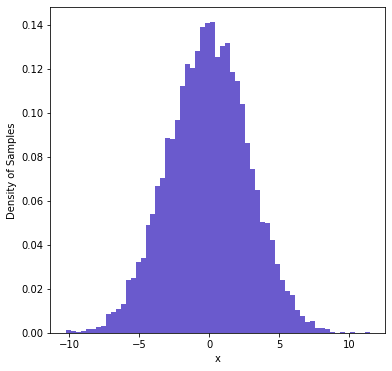

In [ ]:
import matplotlib.pyplot as plt

xs=uniform_mean_mc(10000,100)

plt.figure(figsize=(6,6)) # define figure and its size
plt.xlabel('x') # x-axis label
plt.ylabel('Density of Samples') # y-axis label
plt.hist(xs, density=True, color='slateblue', bins='auto') # produce histogram of xs values
plt.show() # show the entire plot

This plot looks very much like the Gaussian (normal) distribution plot for random variables. And this makes sense, as we run higher and higher numbers of random numbers, we see that our histogram becomes closer and closer to the standard normal distribution curve that we'd expect to see. This is a core tenant of statistics known as the Central Limit Theorem. If we actually look at the random numbers, we see most of them concentrated around the $[-2,2]$ interval, with the rare few stretching out to values as high as $-10$ or $10$ -- which aligns with what we'd expect based on our normal distribution curve.

**Task 1c (3 points).** Implement two functions <tt>smean</tt> and <tt>svar</tt> that use list as an argument and compute sample mean and sample variance for the <tt>ns</tt> sums produced by the function above. 

Compute sample mean and sample variance of the sums produced by the function in 1a for a few different values of <tt>nr</tt> and <tt>ns</tt>. Examine the trends of the sample mean and variance with <tt>nr</tt> and <tt>ns</tt> and describe the trends you are able to identify. 

In [ ]:
def smean(x):
    if x:
        s = 0.
        for i in range(0,len(x)):
            s = s + x[i]
        return s / len(x)
    else: 
        return 0
    
def svar(x):
    if len(x)>1: 
        mu = smean(x)
        s = 0. 
        for i in range(0,len(x)):
            s = s + (x[i]-mu)**2 
        return s / (len(x)-1)
    else:
        print("The variance for an empty list or one number is not determined.")

xs_list=[uniform_mean_mc(5,5),uniform_mean_mc(50,20),uniform_mean_mc(500,30),uniform_mean_mc(100,100),uniform_mean_mc(2500,500)]
ns_list=[5,50,100,500,2500]
nr_list=[5,20,100,30,500]

for i in range(len(xs_list)):
  print("The sample mean of the sums produced by the function in part 1a for ns=" + str(ns_list[i]) + " and nr=" + str(nr_list[i]) + " is",smean(xs_list[i]))
  print("The sample variance of the sums produced by the function in part 1a for ns=" + str(ns_list[i]) + " and nr=" + str(nr_list[i]) + " is",svar(xs_list[i]))
  print()

The sample mean of the sums produced by the function in part 1a for ns=5 and nr=5 is 0.18217779915450277
The sample variance of the sums produced by the function in part 1a for ns=5 and nr=5 is 0.1388444922035534

The sample mean of the sums produced by the function in part 1a for ns=50 and nr=20 is -0.07309505507503124
The sample variance of the sums produced by the function in part 1a for ns=50 and nr=20 is 1.7052600516077856

The sample mean of the sums produced by the function in part 1a for ns=100 and nr=100 is 0.02981011982907425
The sample variance of the sums produced by the function in part 1a for ns=100 and nr=100 is 2.5467545584183138

The sample mean of the sums produced by the function in part 1a for ns=500 and nr=30 is 0.21018806671980503
The sample variance of the sums produced by the function in part 1a for ns=500 and nr=30 is 5.727842584982537

The sample mean of the sums produced by the function in part 1a for ns=2500 and nr=500 is -0.14233679936130747
The sample vari

Observing these different scenarios for $ns$ and $nr$, it looks like the sample mean tends to stay around the same range as all of our sample means are in the interval $[-0.25,0.25]$. However, as we increase $ns$ and $nr$, the sample variance begins to increase dramatically, going from $0.14$ for $ns=5$ and $nr=5$ at the beginning to over $42.4$ for $ns=2500$ and $nr=500$, so it looks like sample variance tends to increase for larger samples.

### <font color='blue'>Exercise 2: testing randomness of a pseudo-random number generators</font> 

**Background info:** [05_prngs](https://drive.google.com/file/d/1rBHcnst3KMF_gPj5ZA1KVfdKh_eE2sNO/view?usp=sharing) notebook introduces approaches used to generate pseudo-random number sequences. Such approaches are implemented in the Pseudo-Random Number Generators (PRNGs) - functions producing pseudo-random numbers or sequences that can be used in a program to carry out Monte Carlo calculations. 

The generated sequences can be considerd pseudo-random, if an observer examining the sequences and not knowing for certain how they are produced cannot determine whether it is a result of a truly random process (e.g., radioactive decay) or were produced by a deterministic algorithm. 

This exercise is about such *tests of randomness* and should give you an idea of how PRNGs are tested. By now we have covered sufficient amount of probability and statistics theory to design such meaningful tests of randomness and this is what you are asked to do in this exercise. 

The exercise is "open-ended" meaning that no detailed prescription is given for how you should design the tests. This is a standard situation in research and you will practice working with such tasks in this course to get familiar with how to handle them. 

You should try to think about the statistical arsenal you already heard about in this course and use your creativity to come with ideas for tests. You are not supposed to design something very complicated. Keep it simple. Meaningful tests can be designed and implemented with only a few lines of code using Python elements you should already know. 

**Task.** Design, implement, and tests at least *two* different tests of randomness of a given random number generator using probability/statistics you learned so far in this course. (10+10=20 points) 

You should try your tests on the RANDU generator that is known to be notoriously bad (it's an LCG generator with particularly bad choices for $a$ and $m$) implemented below. The tests you design  should be sufficiently sensitive to detect that RANDU produces demonstrably non-random integer sequences. So demonstrating how your tests work on RANDU is the first thing to do. (5 points)

After tests with RANDU, you should try to detect non-randomness for an LCG generator with better parameter choices (for example, <tt>a=2733, m=2**31-1</tt>) or for random integers produced by <tt>randint</tt> from Python's <tt>random</tt> module. (5 points)

**_Hint_**: In order to design a test of randomness, you should envision ways in which non-randomness can manifest itself and then design an algorithm to detect such manifestation(s). Some examples of this, such as patterns in low bits of produced numbers have been demonstrated in the [05_prngs](https://drive.google.com/file/d/1rBHcnst3KMF_gPj5ZA1KVfdKh_eE2sNO/view?usp=sharing) notebook. 

**Extra-credit points.** Each additional meaningful test you design beyond two (if it's sufficiently different from the other ones) will give you additional 5 extra points. 

In [ ]:
def lcg(xr, a=65539, m=2**31):
    '''
    Linear Congruential Generator of pseudo-random numbers
    Parameters: xr - integer, previous number in the sequence 
            a: integer, multiplier
            m: integer, period of the sequence
            a=65539, m=2**31 - are bad choices that were made in the infamous RANDU RNGs unleashed by IBM 50 yrs ago
    Returns: integer, the next number in the sequence 
    '''

    return (a*xr) % m

def lcg1(xr, a=2937, m=2**31-1):
    '''
    Linear Congruential Generator of pseudo-random numbers
    Parameters: xr - integer, previous number in the sequence 
            a: integer, multiplier
            m: integer, period of the sequence
            a somewhat better, but still sub-optimal choice of a and m
    Returns: integer, the next number in the sequence 
    '''
    return (a*xr) % m

def lcg2(xr, a=1583458089, m=2**31-1):
    '''
    Linear Congruential Generator of pseudo-random numbers
    Parameters: xr - integer, previous number in the sequence 
            a: integer, multiplier
            m: integer, period of the sequence
            optimal choices for 32-bit integers a and m here from Table 2 of L'Ecuyer (1999) 
    Returns: integer, the next number in the sequence 
    '''
    return (a*xr) % m    

def randu(seed,n=10000):
  xs=[]
  for i in range(1,n+1):
    xs.append(lcg(seed))
    seed = lcg(seed)
  return(xs)

def lcg1r(seed,n=10000):
  xs=[]
  for i in range(1,n+1):
    xs.append(lcg1(seed))
    seed = lcg1(seed)
  return(xs)

def lcg2r(seed,n=10000):
  xs=[]
  for i in range(1,n+1):
    xs.append(lcg2(seed))
    seed = lcg2(seed)
  return(xs)

Consider the last element of each binary output string. Since our only two options are $0$ and $1$ (binary bits) and we are theoretically picking random numbers, then after a large enough number of random numbers, we should have an equal probability of getting a $0$ or a $1$ at the end of our string, specifically a $p_0=0.5$ chance of getting a $0$ and a $p_1=0.5$ chance of getting a $1$. We can create a test of randomness using these facts to check if an output of pseudo-random numbers are random. Let's apply our test to RANDU and see if it works:

In [ ]:
bin_=[]
num=5000 #Num. of random numbers

xs=randu(50)

for i in range(len(xs)):
  bin_.append(bin(xs[i])[2:])

list_end=[]

for i in bin_:
  list_end.append((i)[-1])

for i in range(len(list_end)):
  list_end[i] = int(list_end[i])
 
#print("The last bit of each of our binary output string is:",list_end)

zero=[]
one=[]

for i in list_end:
  if i==0:
    zero.append(i)
  elif i==1:
    one.append(i)
  else:
    print("You done goofed somehow...")
    break

ratio_zero=len(zero)/len(list_end)
ratio_one=len(one)/len(list_end)
print("We have a total of",len(list_end),"randomly generated numbers.")

print("\nFor RANDU:")
print("The ratio of zeroes to total bits amongst the last digit of each of our binary output strings generated is:",ratio_zero)
print("The ratio of ones to total bits amongst the last digit of each of our binary output strings generate is:",ratio_one)

We have a total of 10000 randomly generated numbers.

For RANDU:
The ratio of zeroes to total bits amongst the last digit of each of our binary output strings generated is: 1.0
The ratio of ones to total bits amongst the last digit of each of our binary output strings generate is: 0.0


Here, we have used the RANDU algorithm to find 10000 randomly generated numbers and checked the ratio of 0s (and also 1s) to the total number of last digits in our binary output strings. As we explained before, if our numbers were truly random, or even close to something fairly random, the probability that we get a 0 at the end of our binary output string should be somewhere around $p_0=0.5$ (since our only two options are 0 and 1, and the probability of picking one out of two options is 0.5). However, we have found a probability of getting a 0 at the end of our binary output string of $p_0=1.0$, (i.e. the last digit of each of the binary representation for each of our 10000 randomly generated numbers is 0) so this is *definitely* not a random set of numbers.

Let's now try applying a different test for randomness to RANDU. This test will calculate the ratio of the numbers 1-9 appearing as the first digit of each randomly-generated number out of the total number of first digits (i.e. the total number of randomly-generated numbers). Theoretically, if our numbers were truly random, the ratios of each of the numbers 1 through 9 should be exactly 10% (1/10 for one number out of 10), or $p=0.10$, so let's check RANDU and find out if that algorithm is truly random or not.

In [ ]:
num=50000 #Num. of random numbers

xs=randu(50)
list_first=[]

for i in range(len(xs)):
  list_first.append(str(xs[i])[0])

for i in range(len(list_first)):
  list_first[i] = int(list_first[i])
 
#print("The last bit of each of our binary output string is:",list_end)

one=[]
two=[]
three=[]
four=[]
five=[]
six=[]
seven=[]
eight=[]
nine=[]

for i in list_first:
  if i==1:
    one.append(i)
  elif i==2:
    two.append(i)
  elif i==3:
    three.append(i)
  elif i==4:
    four.append(i)
  elif i==5:
    five.append(i)
  elif i==6:
    six.append(i)
  elif i==7:
    seven.append(i)
  elif i==8:
    eight.append(i)
  elif i==9:
    nine.append(i)
  else:
    print("You done goofed somehow...")
    break

nums=[one, two, three, four, five, six, seven, eight, nine]

ratios=[]
for i in range(len(nums)):
  ratios.append(len(nums[i])/len(list_first))

print("We have a total of",len(list_first),"randomly generated numbers by RANDU.")

print("\nFor RANDU:")
for i in range(len(ratios)):
  print("The ratio of the randomly-generated numbers beginning with the number",(i+1),"to the total number of randomly-generated numbers is",ratios[i])


We have a total of 10000 randomly generated numbers by RANDU.

For RANDU:
The ratio of the randomly-generated numbers beginning with the number 1 to the total number of randomly generated numbers is 0.5127
The ratio of the randomly-generated numbers beginning with the number 2 to the total number of randomly generated numbers is 0.1288
The ratio of the randomly-generated numbers beginning with the number 3 to the total number of randomly generated numbers is 0.0496
The ratio of the randomly-generated numbers beginning with the number 4 to the total number of randomly generated numbers is 0.0519
The ratio of the randomly-generated numbers beginning with the number 5 to the total number of randomly generated numbers is 0.0506
The ratio of the randomly-generated numbers beginning with the number 6 to the total number of randomly generated numbers is 0.0494
The ratio of the randomly-generated numbers beginning with the number 7 to the total number of randomly generated numbers is 0.0506
Th

So we find that over 51% of randomly-generated numbers generated by RANDU start with the number 1, nearly 13% start with the number 2, and then around 5% each for random numbers beginning with the numbers 3-9. This is clearly at odds with our expected probabilities of $p=0.10$ for each of the numbers 1-9. Since RANDU is clearly heavily weighted towards numbers that start with the number 1 and heavily weighted against numbers starting with the digits 3-9, it is safe to say that the set of randomly-generated numbers by the RANDU algorithm is *definitely* not random.

Let's use our two tests of randomness to check the random-number generators LCG 1 and LCG 2, defined above in the same code block as RANDU. Recall that for our last-digit bit test, we hope to find an equal probability $p_0=p_1=0.5$ of getting a 0 or a 1 at the end of each of our binary output strings for their respective random numbers. Let's check if that's the case for both lcg1 and lcg2:

In [ ]:
bin_=[]
num=5000 #Num. of random numbers

xs=lcg1r(50)

for i in range(len(xs)):
  bin_.append(bin(xs[i])[2:])

list_end=[]

for i in bin_:
  list_end.append((i)[-1])

for i in range(len(list_end)):
  list_end[i] = int(list_end[i])
 
#print("The last bit of each of our binary output string is:",list_end)

zero=[]
one=[]

for i in list_end:
  if i==0:
    zero.append(i)
  elif i==1:
    one.append(i)
  else:
    print("You done goofed somehow...")
    break

ratio_zero=len(zero)/len(list_end)
ratio_one=len(one)/len(list_end)
print("We have a total of",len(list_end),"randomly generated numbers by LCG 1.")

print("\nFor LCG 1:")
print("The ratio of zeroes to total bits amongst the last digit of each of our binary output strings generated is:",ratio_zero)
print("The ratio of ones to total bits amongst the last digit of each of our binary output strings generated is:",ratio_one)

We have a total of 10000 randomly generated numbers by LCG 1.

For LCG 1:
The ratio of zeroes to total bits amongst the last digit of each of our binary output strings generated is: 0.5051
The ratio of ones to total bits amongst the last digit of each of our binary output strings generated is: 0.4949


In [ ]:
bin_=[]
num=5000 #Num. of random numbers

xs=lcg2r(50)

for i in range(len(xs)):
  bin_.append(bin(xs[i])[2:])

list_end=[]

for i in bin_:
  list_end.append((i)[-1])

for i in range(len(list_end)):
  list_end[i] = int(list_end[i])
 
#print("The last bit of each of our binary output string is:",list_end)

zero=[]
one=[]

for i in list_end:
  if i==0:
    zero.append(i)
  elif i==1:
    one.append(i)
  else:
    print("You done goofed somehow...")
    break

ratio_zero=len(zero)/len(list_end)
ratio_one=len(one)/len(list_end)
print("We have a total of",len(list_end),"randomly generated numbers by LCG 2.")

print("\nFor LCG 2:")
print("The ratio of zeroes to total bits amongst the last digit of each of our binary output strings generated is:",ratio_zero)
print("The ratio of ones to total bits amongst the last digit of each of our binary output strings generated is:",ratio_one)

We have a total of 10000 randomly generated numbers by LCG 2.

For LCG 2:
The ratio of zeroes to total bits amongst the last digit of each of our binary output strings generated is: 0.4991
The ratio of ones to total bits amongst the last digit of each of our binary output strings generated is: 0.5009


So for both LCG 1 and LCG 2, we find that the probabilities are about the same for getting $0$ and $1$, indicating that our test for randomness fails to detect any non-randomness in the random number generators LCG 1 and LCG 2 (and will almost certainly follow suit for NumPy, which is known to be much more random). However, let's take a look at our other test for randomness.

Now let's check if our other test for randomness works on LCG 1 and LCG 2, where we calculate the ratio of randomly-generated numbers beginning with each digit 1-9. Recall that if our set of numbers generated by LCG 1 and LCG 2 were truly random, then we would get a uniform distribution of first digits between 1-9, so $p=0.10$ for each. Let's find out if that's the case for LCG 1 and LCG 2:

In [ ]:
num=50000 #Num. of random numbers

xs=lcg1r(50)
list_first=[]

for i in range(len(xs)):
  list_first.append(str(xs[i])[0])

for i in range(len(list_first)):
  list_first[i] = int(list_first[i])
 
#print("The last bit of each of our binary output string is:",list_end)

one=[]
two=[]
three=[]
four=[]
five=[]
six=[]
seven=[]
eight=[]
nine=[]

for i in list_first:
  if i==1:
    one.append(i)
  elif i==2:
    two.append(i)
  elif i==3:
    three.append(i)
  elif i==4:
    four.append(i)
  elif i==5:
    five.append(i)
  elif i==6:
    six.append(i)
  elif i==7:
    seven.append(i)
  elif i==8:
    eight.append(i)
  elif i==9:
    nine.append(i)
  else:
    print("You done goofed somehow...")
    break

nums=[one, two, three, four, five, six, seven, eight, nine]

ratios=[]
for i in range(len(nums)):
  ratios.append(len(nums[i])/len(list_first))

print("We have a total of",len(list_first),"randomly generated numbers by LCG 1.")

print("\nFOR LCG 1:")
for i in range(len(ratios)):
  print("The ratio of the randomly-generated numbers generated beginning with the number",(i+1),"to the total number of randomly-generated numbers by is",ratios[i])

We have a total of 10000 randomly generated numbers by LCG 1.

FOR LCG 1:
The ratio of the randomly-generated numbers generated beginning with the number 1 to the total number of randomly generated numbers by is 0.5191
The ratio of the randomly-generated numbers generated beginning with the number 2 to the total number of randomly generated numbers by is 0.1194
The ratio of the randomly-generated numbers generated beginning with the number 3 to the total number of randomly generated numbers by is 0.0491
The ratio of the randomly-generated numbers generated beginning with the number 4 to the total number of randomly generated numbers by is 0.0505
The ratio of the randomly-generated numbers generated beginning with the number 5 to the total number of randomly generated numbers by is 0.0507
The ratio of the randomly-generated numbers generated beginning with the number 6 to the total number of randomly generated numbers by is 0.0557
The ratio of the randomly-generated numbers generated be

In [ ]:
num=50000 #Num. of random numbers

xs=lcg2r(50)
list_first=[]

for i in range(len(xs)):
  list_first.append(str(xs[i])[0])

for i in range(len(list_first)):
  list_first[i] = int(list_first[i])
 
#print("The last bit of each of our binary output string is:",list_end)

one=[]
two=[]
three=[]
four=[]
five=[]
six=[]
seven=[]
eight=[]
nine=[]

for i in list_first:
  if i==1:
    one.append(i)
  elif i==2:
    two.append(i)
  elif i==3:
    three.append(i)
  elif i==4:
    four.append(i)
  elif i==5:
    five.append(i)
  elif i==6:
    six.append(i)
  elif i==7:
    seven.append(i)
  elif i==8:
    eight.append(i)
  elif i==9:
    nine.append(i)
  else:
    print("You done goofed somehow...")
    break

nums=[one, two, three, four, five, six, seven, eight, nine]

ratios=[]
for i in range(len(nums)):
  ratios.append(len(nums[i])/len(list_first))

print("We have a total of",len(list_first),"randomly generated numbers by LCG 2.")

print("\nFOR LCG 2:")
for i in range(len(ratios)):
  print("The ratio of the randomly-generated numbers generated beginning with the number",(i+1),"to the total number of randomly-generated numbers by is",ratios[i])

We have a total of 10000 randomly generated numbers by LCG 1.

FOR LCG 2:
The ratio of the randomly-generated numbers generated beginning with the number 1 to the total number of randomly generated numbers by is 0.5287
The ratio of the randomly-generated numbers generated beginning with the number 2 to the total number of randomly generated numbers by is 0.1146
The ratio of the randomly-generated numbers generated beginning with the number 3 to the total number of randomly generated numbers by is 0.0503
The ratio of the randomly-generated numbers generated beginning with the number 4 to the total number of randomly generated numbers by is 0.0491
The ratio of the randomly-generated numbers generated beginning with the number 5 to the total number of randomly generated numbers by is 0.0515
The ratio of the randomly-generated numbers generated beginning with the number 6 to the total number of randomly generated numbers by is 0.0487
The ratio of the randomly-generated numbers generated be

As we can see for both LCG 1 and LCG 2, the ratio of randomly-generated numbers beginning with the number 1 to the total number of randomly-generated numbers is over 50%, or p=0.50, with the ratios for digits 3-9 being around 5%, or p=0.05. So clearly, our test for randomness demonstrates that LCG 1 and LCG 2 *do not* generate truly random sets of randomly-generated numbers.

However, we can see that our test of randomness fails to detect the pseudo-randomness of NumPy's random-number generator:

In [ ]:
num=5000 #Num. of random numbers

from numpy.random import randint

xs = randint(13, 100000000, size=num)
list_first=[]

for i in range(len(xs)):
  list_first.append(str(xs[i])[0])

for i in range(len(list_first)):
  list_first[i] = int(list_first[i])
 
#print("The last bit of each of our binary output string is:",list_end)

one=[]
two=[]
three=[]
four=[]
five=[]
six=[]
seven=[]
eight=[]
nine=[]

for i in list_first:
  if i==1:
    one.append(i)
  elif i==2:
    two.append(i)
  elif i==3:
    three.append(i)
  elif i==4:
    four.append(i)
  elif i==5:
    five.append(i)
  elif i==6:
    six.append(i)
  elif i==7:
    seven.append(i)
  elif i==8:
    eight.append(i)
  elif i==9:
    nine.append(i)
  else:
    print("You done goofed somehow...")
    break

nums=[one, two, three, four, five, six, seven, eight, nine]

ratios=[]
for i in range(len(nums)):
  ratios.append(len(nums[i])/len(list_first))

print("We have a total of",len(list_first),"randomly generated numbers by NumPy.")

print("\nFOR NumPy:")
for i in range(len(ratios)):
  print("The ratio of the randomly-generated numbers generated beginning with the number",(i+1),"to the total number of randomly-generated numbers by is",ratios[i])

We have a total of 5000 randomly generated numbers by NumPy.

FOR NumPy:
The ratio of the randomly-generated numbers generated beginning with the number 1 to the total number of randomly-generated numbers by is 0.107
The ratio of the randomly-generated numbers generated beginning with the number 2 to the total number of randomly-generated numbers by is 0.1076
The ratio of the randomly-generated numbers generated beginning with the number 3 to the total number of randomly-generated numbers by is 0.1108
The ratio of the randomly-generated numbers generated beginning with the number 4 to the total number of randomly-generated numbers by is 0.1162
The ratio of the randomly-generated numbers generated beginning with the number 5 to the total number of randomly-generated numbers by is 0.1072
The ratio of the randomly-generated numbers generated beginning with the number 6 to the total number of randomly-generated numbers by is 0.1152
The ratio of the randomly-generated numbers generated begi

Since the ratios for each of our starting digits 1-9 are around 0.10, or each shows up about 10% of the time as a first digit, then we can conclude that our test of randomness fails to detect randomness in NumPy's random number generator. While our ratios are not exactly 0.10, if we were to increase the sample size, the ratios would converge to 0.10 as $n\to\infty$.